In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
good_songs = pd.read_csv('datasets/good_cleaned.csv')
good_songs = good_songs[['artist','song','lyrics']].copy()
good_songs

,artist,song,lyrics
0,sam the sham and the pharaohs,wooly bully,sam the sham miscellaneous wooly bully wooly bully sam the sham the pharaohs domingo samudio uno dos one two tres quatro matty told hatty about a thing she saw had two big horns and a wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take no chance lets not belseven come and learn to dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats the thing to do get you someone really to pull the wool with you wooly bully wooly bully wooly bully wooly bully wooly bully lseven the letter l and the number 7 when typed they form a rough square l7 so the lyrics mean lets not be square
1,four tops,i cant help myself sugar pie honey bunch,sugar pie honey bunch you know that i love you i cant help myself i love you and nobody elsein and out my life you come and you go leaving just your picture behind and i kissed it a thousand timeswhen you snap your finger or wink your eye i come arunning to you im tied to your apron strings and theres nothing that i can docant help myself no i cant help myselfsugar pie honey bunch im weaker than a man should be i cant help myself im a fool in love you seewanna tell you i dont love you tell you that were through and ive tried but every time i see your face i get all choked up insidewhen i call your name girl it starts the flame burning in my heart tearing it all apart no matter how i try my love i cannot hidecause sugar pie honey bunch you know that im weak for you cant help myself i love you and nobody elsesugar pie honey bunch do anything you ask me to cant help myself i want you and nobody elsesugar pie honey bunch you know that i love you i cant help myself i cant help myself
2,we five,you were on my mind,when i woke up this morning you were on my mind and you were on my mind i got troubles whoaoh i got worries whoaoh i got wounds to bind so i went to the corner just to ease my pains yeah just to ease my pains i got troubles whoaoh i got worries whoaoh i came home again when i woke up this morning you were on my miiiind and you were on my mind i got troubles whoaoh i got worries whoaoh i got wounds to bind and i got a feelin down in my shooooooes said way down in my shooooes yeah i got to ramble whoaoh i got to move on whoaoh i got to walk away my blues when i woke up this morning you were on my mind you were on my mind i got troubles whoaoh i got worries whoaoh i got wounds to bind
3,the righteous brothers,youve lost that lovin feelin,you never close your eyes anymore when i kiss your lips and theres no tenderness like before in your fingertips youre trying hard not to show it but baby baby i know ityou lost that lovin feelin whoa that lovin feelin you lost that lovin feelin now its gone gone gone wohnow theres no welcome look in your eyes when i reach for you and now youre starting to criticize little things i do it makes me just feel like crying cause baby something beautifuls dyinyou lost that lovin feelin whoa that lovin feelin you lost that lovin feelin now its gone gone gone wohbaby baby id get down on my knees for you if you would only love me like you used to do yeah we had a love a love a love you dont find everyday so dont dont dont dont let it slip awaybaby baby baby baby i beg you please please please please i need your love need your love i need your love i need your love so bring it on back so bring it on back bring it on back bring it on backbring back that lovin feelin whoa that lovin feelin bring back that lovin feelin cause its gone gone gone and i cant go on wohbring back that lovin feelin whoa that lovin feelin bring back that lovin feelin cause its gone gone gone
4,petula clark,downtown,when youre alone and life is making you lonely you can always go downtown when youve got worries all the noise and the hurry seems to help i know downtownjust listen to the music of the traffic in the city linger on the sidewalk where the neon signs are pret

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Read the dataset
good_songs = pd.read_csv('datasets/good_cleaned.csv')
good_songs = good_songs[['artist', 'song', 'lyrics']].copy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(good_songs['lyrics'], good_songs['artist'], test_size=0.2, random_state=42)

In [7]:
# Download the English and Spanish stop words from NLTK
nltk.download('stopwords')
english_stop_words = stopwords.words('english')
spanish_stop_words = stopwords.words('spanish')

# Combine the stop words into a single list
stop_words = english_stop_words + spanish_stop_words

# Create a CountVectorizer object with stop words
vect = CountVectorizer(stop_words=stop_words)

# Fit and transform the lyrics in the training set
text_train = vect.fit_transform(X_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\elits\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


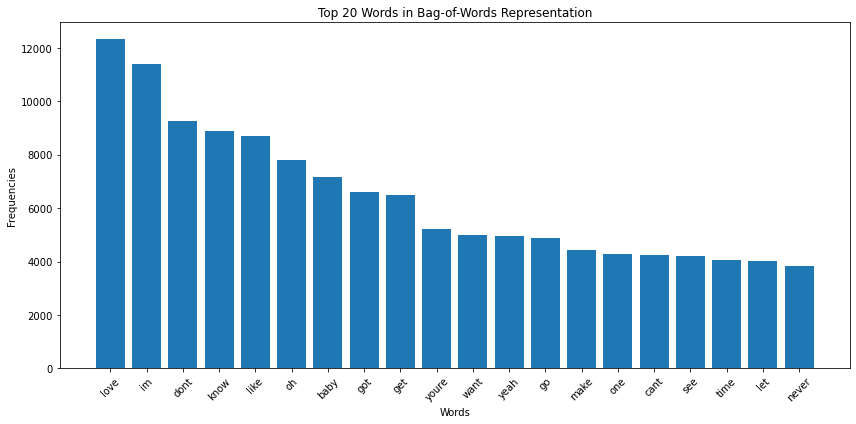

In [8]:
# Get the feature names (words) from the CountVectorizer
feature_names = vect.get_feature_names()

# Calculate the word frequencies in the training set
word_frequencies = text_train.sum(axis=0)

# Create a dictionary with words as keys and their corresponding frequencies as values
word_freq_dict = dict(zip(feature_names, word_frequencies.tolist()[0]))

# Sort the dictionary by word frequencies in descending order
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 words and their frequencies
top_words = [item[0] for item in sorted_word_freq[:20]]
top_freqs = [item[1] for item in sorted_word_freq[:20]]

# Plot the top 20 words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_freqs)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Words in Bag-of-Words Representation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
pd.set_option('display.max_colwidth', None)
result = good_songs['lyrics'].str.contains('baby').sum()
result

1945